In [1]:
import joblib, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
my_package = 'C:\\Users\\welcome\\Desktop\\MyFuncs'
imp_mods = joblib.os.sys.path

if my_package not in imp_mods:
    imp_mods.append(my_package)
    print('Package imported!')

Package imported!


In [3]:
import myio_funcs as mf, ds_funcs as dsf

In [4]:
# joblib.os.listdir("W:\\Analyst & Business Skillset\\Data analysis\\Datasets\\KPMG Raw Datasets")

In [5]:
pth = "C:\\Users\\welcome\\Documents\\Data science"
kpmg_pth = "W:\\Analyst & Business Skillset\\Data analysis\\Datasets\\KPMG Raw Datasets"
sf = mf.file_search(kpmg_pth, 'KPMG', 'csv')
sf.keys()

dict_keys(['cleaned-KPMG-cust-trans.csv', 'KPMG_VI_Customer_Address.csv', 'KPMG_VI_Customer_Demographic.csv', 'KPMG_VI_New_Customer_List.csv', 'KPMG_VI_Transactions (Oct-Nov-Dec).csv', 'KPMG_VI_Transactions.csv', 'KPMG_VI_Transactions2.csv'])

In [6]:
kpmg_df = pd.read_csv(sf['cleaned-KPMG-cust-trans.csv'])
kpmg_df.head()

,customer_id,first_name,last_name,gender,address,postcode,state,DOB,job_title,job_industry_category,...,product_class,product_size,list_price,standard_cost,product_first_sold_date,trans_week_day,trans_day_num,trans_month_num,trans_month,trans_year
0,2950,Kristos,Anthony,Male,984 Hoepker Court,3064,Victoria,1955-01-11,Software Engineer I,Financial Services,...,medium,medium,71.49,53.62,2012-12-02,Saturday,25,2,February,2017
1,3120,Lauree,O'Donnell,Female,4 Shopko Circle,2196,New South Wales,1979-02-04,Clinical Specialist,Health,...,medium,large,2091.47,388.92,2014-03-03,Sunday,21,5,May,2017
2,402,Berne,Donegan,Male,586 Miller Parkway,2835,New South Wales,1977-06-03,Desktop Support Technician,Retail,...,low,medium,1793.43,248.82,1999-07-20,Monday,16,10,October,2017
3,3135,Titus,Worsall,Male,1617 Harper Parkway,2096,New South Wales,1962-01-14,Staff Scientist,Financial Services,...,medium,medium,1198.46,381.10,1998-12-16,Thursday,31,8,August,2017
4,787,Norma,Batrim,Female,0601 Stephen Place,2292,New South Wales,1996-12-15,Sales Representative,Retail,...,medium,large,1765.30,709.48,2015-08-10,Sunday,1,10,October,2017


In [7]:
kpmg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19409 entries, 0 to 19809
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          19409 non-null  int64  
 1   first_name                           19409 non-null  object 
 2   last_name                            19409 non-null  object 
 3   gender                               19409 non-null  object 
 4   address                              19409 non-null  object 
 5   postcode                             19409 non-null  int64  
 6   state                                19409 non-null  object 
 7   DOB                                  19152 non-null  object 
 8   job_title                            19409 non-null  object 
 9   job_industry_category                19409 non-null  object 
 10  wealth_segment                       19409 non-null  object 
 11  owns_car                    

In [8]:
kpmg_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender', 'address',
       'postcode', 'state', 'DOB', 'job_title', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'property_valuation',
       'past_3_years_bike_related_purchases', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'trans_week_day', 'trans_day_num',
       'trans_month_num', 'trans_month', 'trans_year'],
      dtype='object')

#### Make transaction_id column the dataframe index 


In [9]:
kpmg_df.loc[kpmg_df['transaction_id'].duplicated()]

,customer_id,first_name,last_name,gender,address,postcode,state,DOB,job_title,job_industry_category,...,product_class,product_size,list_price,standard_cost,product_first_sold_date,trans_week_day,trans_day_num,trans_month_num,trans_month,trans_year


In [10]:
kpmg_df = kpmg_df.set_axis(labels=kpmg_df['transaction_id'], axis=0).drop(labels='transaction_id', axis=1)

In [11]:
kpmg_df.head()

,customer_id,first_name,last_name,gender,address,postcode,state,DOB,job_title,job_industry_category,...,product_class,product_size,list_price,standard_cost,product_first_sold_date,trans_week_day,trans_day_num,trans_month_num,trans_month,trans_year
transaction_id,,,,,,,,,,,,,,,,,,,,,
1,2950,Kristos,Anthony,Male,984 Hoepker Court,3064,Victoria,1955-01-11,Software Engineer I,Financial Services,...,medium,medium,71.49,53.62,2012-12-02,Saturday,25,2,February,2017
2,3120,Lauree,O'Donnell,Female,4 Shopko Circle,2196,New South Wales,1979-02-04,Clinical Specialist,Health,...,medium,large,2091.47,388.92,2014-03-03,Sunday,21,5,May,2017
3,402,Berne,Donegan,Male,586 Miller Parkway,2835,New South Wales,1977-06-03,Desktop Support Technician,Retail,...,low,medium,1793.43,248.82,1999-07-20,Monday,16,10,October,2017
4,3135,Titus,Worsall,Male,1617 Harper Parkway,2096,New South Wales,1962-01-14,Staff Scientist,Financial Services,...,medium,medium,1198.46,381.10,1998-12-16,Thursday,31,8,August,2017
5,787,Norma,Batrim,Female,0601 Stephen Place,2292,New South Wales,1996-12-15,Sales Representative,Retail,...,medium,large,1765.30,709.48,2015-08-10,Sunday,1,10,October,2017


In [12]:
kpmg_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender', 'address',
       'postcode', 'state', 'DOB', 'job_title', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'property_valuation',
       'past_3_years_bike_related_purchases', 'product_id', 'transaction_date',
       'online_order', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'trans_week_day', 'trans_day_num',
       'trans_month_num', 'trans_month', 'trans_year'],
      dtype='object')

#### Consider the remaining ID columns as unique identifiers

In [13]:
id_cols = kpmg_df.columns[kpmg_df.columns.str.endswith('id')]
id_cols

Index(['customer_id', 'product_id'], dtype='object')

In [14]:
# help(pd.DataFrame().cummax)

In [15]:
kpmg_df['product_id'].describe()

count    19409.000000
mean        45.757381
std         30.565266
min          0.000000
25%         18.000000
50%         45.000000
75%         72.000000
max        100.000000
Name: product_id, dtype: float64

In [16]:
kpmg_df['customer_id'].describe()

count    19409.000000
mean      1741.357360
std       1009.886488
min          1.000000
25%        861.000000
50%       1741.000000
75%       2615.000000
max       3500.000000
Name: customer_id, dtype: float64

In [17]:
# Remove 'product_first_sold_date' feature
# kpmg_df = kpmg_df.drop(labels=['product_first_sold_date'], axis=1)
# kpmg_df.columns

### CALCULATE SALES VOLUME

#### PRODUCT SALES VOLUME

In [18]:
prod_sales_vol = kpmg_df['product_id'].value_counts()
prod_sales_vol

0      1155
3       348
1       307
38      265
35      263
       ... 
71      134
8       133
75      133
100     126
47      120
Name: product_id, Length: 101, dtype: int64

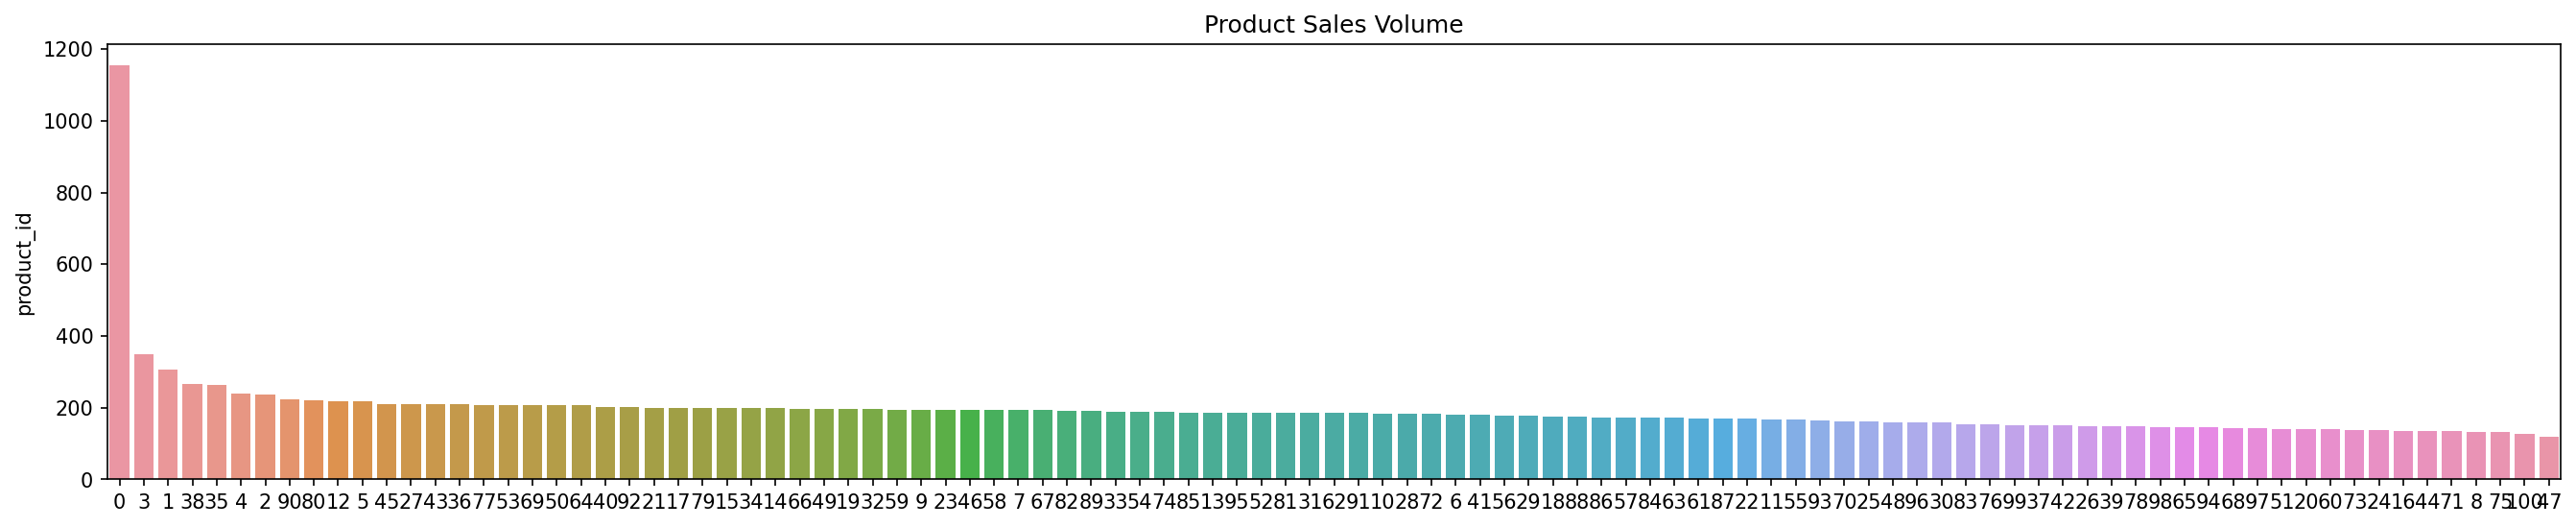

In [19]:
plt.figure(figsize=(22, 4), dpi=150)
sns.barplot(x=prod_sales_vol.index, y=prod_sales_vol, order=prod_sales_vol.index)
plt.title("Product Sales Volume")
# plt.legend(labels=prod_sales_vol.index, bbox_to_anchor=[.5, .3, .5, .2])
plt.show()

In [20]:
# plt.figure(figsize=(22, 4), dpi=150)
# sns.countplot(data=kpmg_df, x='product_id')

<b>Note:<br> Top selling product is product_id: 0</b>

#### BRAND SALES VOLUME

In [21]:
brand_sales_vol = kpmg_df['brand'].value_counts()
brand_sales_vol

Solex             4176
Giant Bicycles    3255
WeareA2B          3218
OHM Cycles        2990
Trek Bicycles     2925
Norco Bicycles    2845
Name: brand, dtype: int64

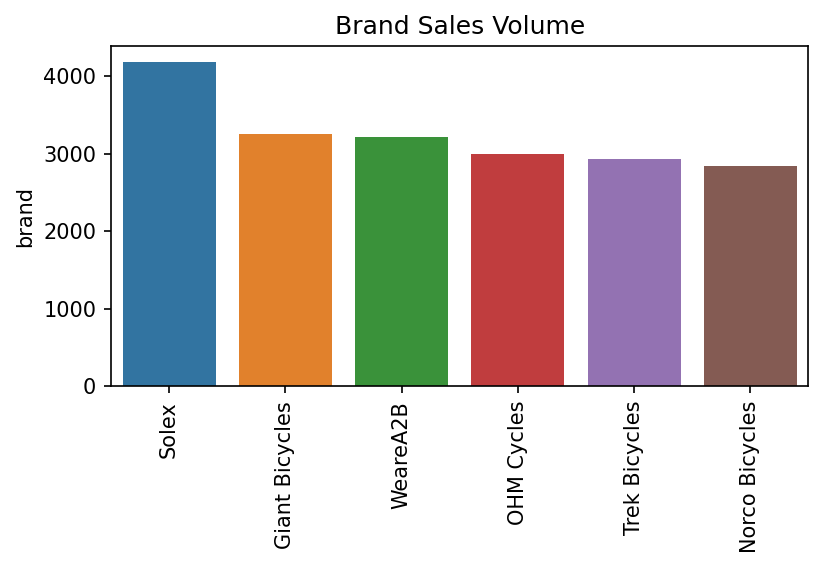

In [22]:
plt.figure(figsize=(6, 3), dpi=150)
sns.barplot(x=brand_sales_vol.index, y=brand_sales_vol)
plt.xticks(rotation=90)
plt.title('Brand Sales Volume')
plt.show()

<b>NOTE:<br>
    Top selling brand is Solex</b>

#### Product Sales Volume per Brand category

In [23]:
# number of occurrences of product_id per brand name
pr_br_sales_vol = kpmg_df[['brand', 'product_id']].value_counts().reset_index()
pr_br_sales_vol.columns = pr_br_sales_vol.columns.astype(np.str_).str.replace('0', 'count')

# re-ordering the dataframe by brand name (asc), count (desc)
pr_br_sales_vol = pd.DataFrame(pr_br_sales_vol.sort_values(by=['brand', 'count'], ascending=[True, False]) )
pr_br_sales_vol.index = range(len(pr_br_sales_vol))

pr_br_sales_vol.loc[pr_br_sales_vol['brand'].isin(['Solex', 'Giant Bicycles'])].iloc[:40]

,brand,product_id,count
0,Giant Bicycles,1,307
1,Giant Bicycles,32,196
2,Giant Bicycles,4,179
3,Giant Bicycles,69,155
4,Giant Bicycles,31,152
5,Giant Bicycles,39,149
6,Giant Bicycles,78,148
7,Giant Bicycles,66,147
8,Giant Bicycles,94,146
9,Giant Bicycles,33,142


#### Best selling product per brand category

In [24]:
pr_br_sales_vol.drop_duplicates(subset='brand').sort_values('count', ascending=False)

,brand,product_id,count
117,Trek Bicycles,3,348
0,Giant Bicycles,1,307
81,Solex,0,270
54,OHM Cycles,0,239
29,Norco Bicycles,0,233
140,WeareA2B,92,203


#### Product sales volume per 'product_class', 'product_line' and 'brand'

In [25]:
prod_sales_vol = pd.DataFrame(kpmg_df[['product_class', 'product_line', 'brand', 'product_id']].value_counts())#.reset_index()
# prod_br_sales_vol.columns = prod_br_sales_vol.columns.astype(np.str_).str.replace('0', 'count')
prod_sales_vol.columns = prod_sales_vol.columns.astype(np.str_).str.replace('0', 'sold_units')
prod_sales_vol

sold_units
product_class product_line brand          product_id            
medium        Standard     Trek Bicycles  3                  348
                           Giant Bicycles 1                  267
                           Solex          0                  228
low           Standard     Solex          36                 209
medium        Standard     Solex          2                  193
...                                                          ...
high          Standard     Solex          62                  36
low           Road         WeareA2B       76                  36
medium        Standard     WeareA2B       31                  33
              Road         Norco Bicycles 70                  26
              Standard     OHM Cycles     30                  21

[185 rows x 1 columns]

In [26]:
prod_sales_vol.xs(['medium', 'Standard'])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2895: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


sold_units
brand          product_id            
Trek Bicycles  3                  348
Giant Bicycles 1                  267
Solex          0                  228
               2                  193
WeareA2B       54                 189
...                               ...
OHM Cycles     72                  40
Giant Bicycles 96                  40
Trek Bicycles  0                   38
WeareA2B       31                  33
OHM Cycles     30                  21

[87 rows x 1 columns]

In [27]:
# plt.figure(figsize=(6, 3), dpi=150)
# sns.countplot(data=pr_br_sales_vol, x='product_id', hue='brand')
# plt.xticks(rotation=90, size=3);

In [28]:
# sns.barplot(x=pr_br_sales_vol.index, y=pr_br_sales_vol['count'])

In [29]:
# plt.figure(figsize=(50,10), dpi=200)
# sns.countplot(data=kpmg_df, hue='brand', x='product_id')

#### Brand Sales Volume per Product ID category

In [30]:
br_pr_sales_vol = kpmg_df[['product_id', 'brand']].value_counts().reset_index()
br_pr_sales_vol.columns = br_pr_sales_vol.columns.astype(np.str_).str.replace('0', 'count')

# reordering the dataframe by product_id (asc), count (desc)
br_pr_sales_vol = pd.DataFrame(br_pr_sales_vol.sort_values(by=['product_id', 'count'], ascending=[True, False]))

# reassigning a proper numeric index for the dataframe
br_pr_sales_vol.index = range(len(br_pr_sales_vol))

# display details for products 0 & 2
br_pr_sales_vol.loc[ ( br_pr_sales_vol['product_id'].isin([0, 2]) )]# & (br_pr_sales_vol['brand'].isin(['Solex', 'Trek Bicycles']) )]

,product_id,brand,count
0,0,Solex,270
1,0,OHM Cycles,239
2,0,Norco Bicycles,233
3,0,Trek Bicycles,214
4,0,Giant Bicycles,104
5,0,WeareA2B,95
7,2,Solex,193
8,2,Giant Bicycles,45


In [31]:
kpmg_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender', 'address',
       'postcode', 'state', 'DOB', 'job_title', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'property_valuation',
       'past_3_years_bike_related_purchases', 'product_id', 'transaction_date',
       'online_order', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'trans_week_day', 'trans_day_num',
       'trans_month_num', 'trans_month', 'trans_year'],
      dtype='object')

#### Top 5 buyers

In [32]:
top_5 = kpmg_df['customer_id'].value_counts().iloc[:5]
print(top_5)

# details of top 5 buyers
kpmg_df.loc[kpmg_df.index.isin(top_5.index), ['customer_id', 'first_name', 'last_name', 'gender', 'address',
                                              'postcode', 'state', 'DOB', 'job_title',
                                              'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age',
                                              'property_valuation', 'past_3_years_bike_related_purchases'] ]

2183    14
1068    14
2476    14
3232    13
3048    13
Name: customer_id, dtype: int64


,customer_id,first_name,last_name,gender,address,postcode,state,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,property_valuation,past_3_years_bike_related_purchases
transaction_id,,,,,,,,,,,,,,,,
1068,2215,Viola,Wadhams,Female,6672 Butternut Avenue,3458,Victoria,1971-02-20,Structural Engineer,Financial Services,Mass Customer,Yes,18.0,50,6,50
2183,2340,Joachim,Amer,Male,29 Portage Street,4070,Queensland,1978-03-29,Research Assistant IV,Health,Mass Customer,Yes,16.0,43,7,33
2476,3055,Viki,Drache,Female,99142 Eastwood Way,4870,Queensland,1999-08-23,General Manager,Manufacturing,Mass Customer,Yes,2.0,21,6,96
3048,678,Ambur,Symcoxe,Female,96910 Sugar Point,4352,Queensland,1995-08-31,Accounting Assistant II,IT,High Net Worth,No,2.0,25,7,57
3232,2941,Emylee,Pavlov,Female,692 Anniversary Junction,4207,Queensland,1963-08-05,Sales Representative,Retail,Mass Customer,No,10.0,58,1,38


<AxesSubplot:ylabel='customer_id'>

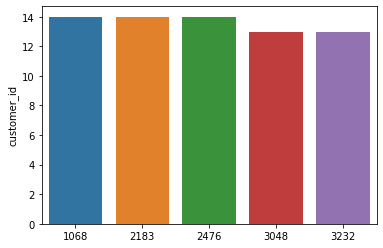

In [33]:
# visualize result
sns.barplot(x=top_5.index, y=top_5)

<b>NOTE:<br>
    The top three buyers have each bought 14 times</b>

In [34]:
kpmg_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender', 'address',
       'postcode', 'state', 'DOB', 'job_title', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'property_valuation',
       'past_3_years_bike_related_purchases', 'product_id', 'transaction_date',
       'online_order', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'trans_week_day', 'trans_day_num',
       'trans_month_num', 'trans_month', 'trans_year'],
      dtype='object')

#### Popularity of online orders

In [35]:
print(kpmg_df['online_order'].dtypes)
onl_ord = kpmg_df['online_order'].value_counts()
onl_ord

object


True     9534
False    9528
None      347
Name: online_order, dtype: int64

<AxesSubplot:ylabel='online_order'>

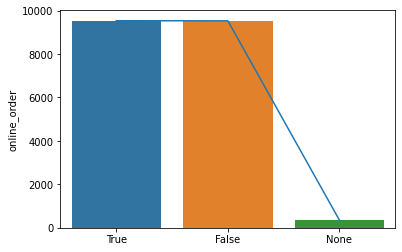

In [36]:
sns.lineplot(x=onl_ord.index, y=onl_ord)
sns.barplot(x=onl_ord.index, y=onl_ord)

<b>NOTE:<br>
    customers seem to make as many orders online as the do in person</b>

#### Age distribution of buyers

(15.0, 100.0)

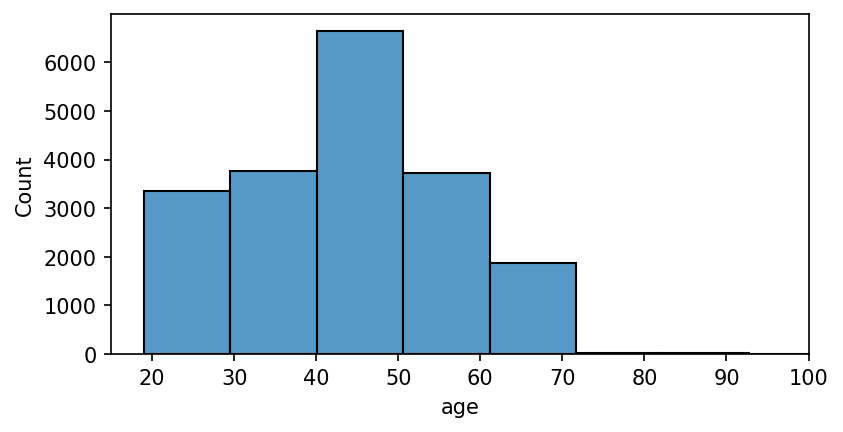

In [37]:
plt.figure(figsize=(6, 3), dpi=150)
sns.histplot(kpmg_df, x='age', bins=15)
plt.xlim(left=15, right=100)

<b>NOTE:<br>
    Majority of buyers fall between ages 29 to 62

In [38]:
kpmg_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender', 'address',
       'postcode', 'state', 'DOB', 'job_title', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'property_valuation',
       'past_3_years_bike_related_purchases', 'product_id', 'transaction_date',
       'online_order', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'trans_week_day', 'trans_day_num',
       'trans_month_num', 'trans_month', 'trans_year'],
      dtype='object')

#### STATE COLUMN

In [39]:
# Reorganising the state for data consistency
# kpmg_df['state'] = kpmg_df['state'].str.replace('NSW', 'New South Wales').str.replace('VIC', 'Victoria').str.replace('QLD', 'Queensland')
result = kpmg_df['state'].value_counts()
result

New South Wales    10356
Victoria            4889
Queensland          4164
Name: state, dtype: int64

<AxesSubplot:ylabel='state'>

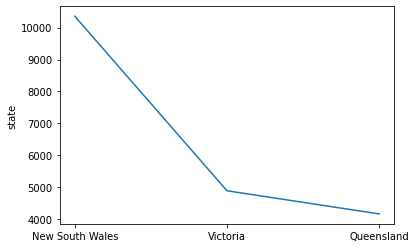

In [40]:
sns.lineplot(x=result.index, y=result)
# plt.xticks(rotation=90, size=10);

<b>NOTE:<br></b>
    We can see that only three states bought our products: New South Wales, Victoria, Queensland<br>
    Top buying state was New South Wales<br>
    And the least buying state was Queensland

In [41]:
kpmg_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender', 'address',
       'postcode', 'state', 'DOB', 'job_title', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'property_valuation',
       'past_3_years_bike_related_purchases', 'product_id', 'transaction_date',
       'online_order', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'trans_week_day', 'trans_day_num',
       'trans_month_num', 'trans_month', 'trans_year'],
      dtype='object')

#### HOW MANY BUYERS ARE CAR OWNERS?

In [42]:
result = kpmg_df['owns_car'].value_counts()
result

Yes    9794
No     9615
Name: owns_car, dtype: int64

Text(0.5, 1.0, 'Buyers that own car(s)')

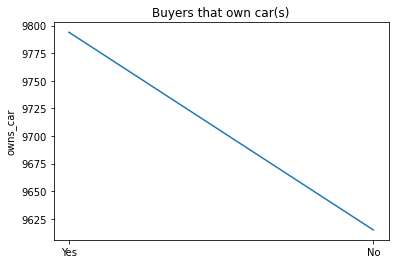

In [43]:
sns.lineplot(x=result.index, y=result)
plt.title("Buyers that own car(s)")
# plt.xticks(rotation=90, size=10);

In [44]:
kpmg_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender', 'address',
       'postcode', 'state', 'DOB', 'job_title', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'property_valuation',
       'past_3_years_bike_related_purchases', 'product_id', 'transaction_date',
       'online_order', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'trans_week_day', 'trans_day_num',
       'trans_month_num', 'trans_month', 'trans_year'],
      dtype='object')

#### Create a Profit feature from list_price and standard_cost features

In [45]:
print(kpmg_df[['list_price', 'standard_cost']].dtypes)

list_price       float64
standard_cost    float64
dtype: object


In [46]:
print(kpmg_df['list_price'].describe())
print()
print(kpmg_df['standard_cost'].describe())

count    19409.000000
mean      1107.609131
std        583.064161
min         12.010000
25%        575.270000
50%       1163.890000
75%       1635.300000
max       2091.470000
Name: list_price, dtype: float64

count    19409.000000
mean       556.143127
std        405.898936
min          7.210000
25%        215.140000
50%        507.580000
75%        795.100000
max       1759.850000
Name: standard_cost, dtype: float64


In [47]:
kpmg_df[['standard_cost']].head()

,standard_cost
transaction_id,
1,53.62
2,388.92
3,248.82
4,381.10
5,709.48


In [57]:
# As we can see from above, standard cost column contains
# '$' and ',' characters
# which we must remove
trans_profit = kpmg_df['list_price'] - kpmg_df['standard_cost']#.str.replace(',', '').apply(lambda row: float(row[1:]))
trans_profit.name = 'trans_profit'
trans_profit.head()

transaction_id
1      17.87
2    1702.55
3    1544.61
4     817.36
5    1055.82
Name: trans_profit, dtype: float64

In [58]:
trans_profit.describe()

count    19409.000000
mean       551.466003
std        493.371260
min          4.800000
25%        133.780000
50%        445.210000
75%        830.240000
max       1702.550000
Name: trans_profit, dtype: float64

#### Our most profitable transaction in history

In [61]:
trans_profit = trans_profit.sort_values(ascending=False)
trans_profit.iloc[:10]

transaction_id
2598     1702.55
1885     1702.55
1363     1702.55
11225    1702.55
1360     1702.55
18470    1702.55
18471    1702.55
7598     1702.55
6811     1702.55
13817    1702.55
Name: trans_profit, dtype: float64

In [62]:
kpmg_df.loc[kpmg_df.index.isin(trans_profit.iloc[:10].index)]

,customer_id,first_name,last_name,gender,address,postcode,state,DOB,job_title,job_industry_category,...,product_class,product_size,list_price,standard_cost,product_first_sold_date,trans_week_day,trans_day_num,trans_month_num,trans_month,trans_year
transaction_id,,,,,,,,,,,,,,,,,,,,,
1360,3289,Frederico,Spearman,Male,8107 Coolidge Pass,2075,New South Wales,1978-01-04,Assistant Manager,Property,...,medium,large,2091.47,388.92,2011-05-07,Thursday,17,8,August,2017
1363,2347,L;urette,Annott,Female,1081 Laurel Park,2049,New South Wales,1957-03-04,Programmer Analyst I,Financial Services,...,medium,large,2091.47,388.92,2012-09-15,Monday,15,5,May,2017
1885,2560,Sherm,Tythe,Male,583 Eagle Crest Road,2000,New South Wales,1980-10-01,Developer IV,Manufacturing,...,medium,large,2091.47,388.92,2012-09-15,Sunday,30,4,April,2017
2598,2506,Arlana,Ferrick,Female,99488 Mccormick Terrace,2207,New South Wales,1955-01-20,Social Worker,Health,...,medium,large,2091.47,388.92,2012-09-15,Saturday,18,2,February,2017
6811,1391,Winni,Cana,Female,220 Mitchell Place,3099,Victoria,1976-08-05,Marketing Assistant,Retail,...,medium,large,2091.47,388.92,2012-09-15,Saturday,21,10,October,2017
7598,3249,Cortney,Leet,Female,49 Surrey Pass,2325,New South Wales,1981-08-23,Analog Circuit Design manager,Manufacturing,...,medium,large,2091.47,388.92,1999-12-04,Friday,9,6,June,2017
11225,2070,Tiphany,Leppington,Female,7949 Waywood Way,2318,New South Wales,1981-12-05,Recruiting Manager,Manufacturing,...,medium,large,2091.47,388.92,2006-05-22,Thursday,16,2,February,2017
13817,1410,Althea,Macvey,Female,4370 Haas Trail,2870,New South Wales,1997-01-22,Marketing Manager,Retail,...,medium,large,2091.47,388.92,2015-06-17,Friday,17,2,February,2017
18470,3494,Robers,Richen,Male,35 Chive Alley,2033,New South Wales,1998-12-24,Account Representative IV,Argiculture,...,medium,large,2091.47,388.92,2012-09-15,Saturday,8,4,April,2017


#### Top 3 most profitable customers

In [63]:
analyze_df = pd.merge(left=kpmg_df, right=trans_profit, how='inner', left_index=True, right_index=True)
analyze_df.head()

,customer_id,first_name,last_name,gender,address,postcode,state,DOB,job_title,job_industry_category,...,product_size,list_price,standard_cost,product_first_sold_date,trans_week_day,trans_day_num,trans_month_num,trans_month,trans_year,trans_profit
transaction_id,,,,,,,,,,,,,,,,,,,,,
1,2950,Kristos,Anthony,Male,984 Hoepker Court,3064,Victoria,1955-01-11,Software Engineer I,Financial Services,...,medium,71.49,53.62,2012-12-02,Saturday,25,2,February,2017,17.87
2,3120,Lauree,O'Donnell,Female,4 Shopko Circle,2196,New South Wales,1979-02-04,Clinical Specialist,Health,...,large,2091.47,388.92,2014-03-03,Sunday,21,5,May,2017,1702.55
3,402,Berne,Donegan,Male,586 Miller Parkway,2835,New South Wales,1977-06-03,Desktop Support Technician,Retail,...,medium,1793.43,248.82,1999-07-20,Monday,16,10,October,2017,1544.61
4,3135,Titus,Worsall,Male,1617 Harper Parkway,2096,New South Wales,1962-01-14,Staff Scientist,Financial Services,...,medium,1198.46,381.10,1998-12-16,Thursday,31,8,August,2017,817.36
5,787,Norma,Batrim,Female,0601 Stephen Place,2292,New South Wales,1996-12-15,Sales Representative,Retail,...,large,1765.30,709.48,2015-08-10,Sunday,1,10,October,2017,1055.82


#### Rearrange column order of the dataframe

In [64]:
analyze_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender', 'address',
       'postcode', 'state', 'DOB', 'job_title', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'property_valuation',
       'past_3_years_bike_related_purchases', 'product_id', 'transaction_date',
       'online_order', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'trans_week_day', 'trans_day_num',
       'trans_month_num', 'trans_month', 'trans_year', 'trans_profit'],
      dtype='object')

In [65]:
analyze_df = analyze_df[['customer_id', 'first_name', 'last_name', 'gender', 'address',
                       'postcode', 'state', 'DOB', 'job_title', 'job_industry_category',
                       'wealth_segment', 'owns_car', 'tenure', 'age', 'property_valuation',
                       'past_3_years_bike_related_purchases', 'product_id', 'transaction_date',
                       'online_order', 'brand', 'product_line', 'product_class',
                       'product_size', 'product_first_sold_date', 'trans_week_day', 'trans_day_num',
                       'trans_month_num', 'trans_month', 'trans_year',
                        'standard_cost', 'list_price', 'trans_profit']]
analyze_df.iloc[:5]

,customer_id,first_name,last_name,gender,address,postcode,state,DOB,job_title,job_industry_category,...,product_size,product_first_sold_date,trans_week_day,trans_day_num,trans_month_num,trans_month,trans_year,standard_cost,list_price,trans_profit
transaction_id,,,,,,,,,,,,,,,,,,,,,
1,2950,Kristos,Anthony,Male,984 Hoepker Court,3064,Victoria,1955-01-11,Software Engineer I,Financial Services,...,medium,2012-12-02,Saturday,25,2,February,2017,53.62,71.49,17.87
2,3120,Lauree,O'Donnell,Female,4 Shopko Circle,2196,New South Wales,1979-02-04,Clinical Specialist,Health,...,large,2014-03-03,Sunday,21,5,May,2017,388.92,2091.47,1702.55
3,402,Berne,Donegan,Male,586 Miller Parkway,2835,New South Wales,1977-06-03,Desktop Support Technician,Retail,...,medium,1999-07-20,Monday,16,10,October,2017,248.82,1793.43,1544.61
4,3135,Titus,Worsall,Male,1617 Harper Parkway,2096,New South Wales,1962-01-14,Staff Scientist,Financial Services,...,medium,1998-12-16,Thursday,31,8,August,2017,381.10,1198.46,817.36
5,787,Norma,Batrim,Female,0601 Stephen Place,2292,New South Wales,1996-12-15,Sales Representative,Retail,...,large,2015-08-10,Sunday,1,10,October,2017,709.48,1765.30,1055.82


#### Profit per Customer

In [72]:
# number of customers
analyze_df.drop_duplicates(subset='customer_id').shape[0]

3456

In [73]:
cust_profit = analyze_df[['customer_id', 'trans_profit']].groupby('customer_id').sum().sort_values('trans_profit', ascending=False)
cust_profit = cust_profit.rename(mapper={'trans_profit': 'cust_profit'}, axis=1)

In [77]:
cust_profit.sort_index()

,cust_profit
customer_id,
1,3018.09
2,2226.26
4,220.57
5,2394.94
6,3946.55
...,...
3496,2045.84
3497,1648.32
3498,3147.33


#### Sales volume per customer

In [79]:
cust_sales = analyze_df[['customer_id']].value_counts()
cust_sales.name = 'units_sold'

In [82]:
cust_sales = pd.DataFrame(cust_sales)
cust_sales

,units_sold
customer_id,
1068,14
2183,14
2476,14
2464,13
1946,13
...,...
3179,1
2271,1
2291,1


In [83]:
# pd.merge(left=analyze_df.loc[analyze_df.index.isin(cond.index)], right=cond, 
#          how='inner', left_index=True, right_index=True).sort_values(by='total_profit', ascending=False)

In [93]:
# <b> NOTE:<br>
#     The top three buyers that generated the highest profits are:<br>
#     1. Ally Bruhnke (169) - 11, 668.95
#     2. Querida Danilchev (457) - 11,222.65
#     3. Keeley Kruger (255) - 10787.60

#### Number of times the top three most profitable buyers did business with us

In [86]:
cust_sales.iloc[:3]

,units_sold
customer_id,
1068,14
2183,14
2476,14


In [91]:
result = pd.merge(left=analyze_df[['customer_id', 'first_name', 'last_name', 'gender']].drop_duplicates(subset='customer_id'), 
         right=cust_sales, how='inner', left_on='customer_id', right_index=True).sort_values('customer_id').reset_index(drop=True)
result

,customer_id,first_name,last_name,gender,units_sold
0,1,Laraine,Medendorp,Female,11
1,2,Eli,Bockman,Male,3
2,4,Talbot,Unknown,Male,2
3,5,Sheila-kathryn,Calton,Female,6
4,6,Curr,Duckhouse,Male,5
...,...,...,...,...,...
3451,3496,Danya,Burnyeat,Male,4
3452,3497,Thia,O'Day,Female,3
3453,3498,Lois,Abrahim,Female,6
3454,3499,Shelton,Tewkesberrie,Male,7


In [92]:
# pd.merge(left=result, right=cond, how='inner', left_index=True, right_index=True).sort_values('total_profit', ascending=False)

In [95]:
# <b>NOTE:<br></b>
#     <b>Ally Bruhnke</b> bought (169) <b>10 times</b> and we made a profit of 11, 668.95,<br>
#     <b>Querida Danilchev</b> (457) bought <b>11 times</b> and we made a profit of 11,222.65.<br>
#     And we made a profit of  10787.60 from <b>Keeley Kruger's</b> (255) <b>8 times</b> purchases

In [96]:
kpmg_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender', 'address',
       'postcode', 'state', 'DOB', 'job_title', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'property_valuation',
       'past_3_years_bike_related_purchases', 'product_id', 'transaction_date',
       'online_order', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'trans_week_day', 'trans_day_num',
       'trans_month_num', 'trans_month', 'trans_year'],
      dtype='object')

#### GENERAL PRODUCT FEATURES ANALYSIS

In [98]:
analyze_df['product_line'].value_counts().sort_values(ascending=False)

Standard    13903
Road         3887
Touring      1206
Mountain      413
Name: product_line, dtype: int64

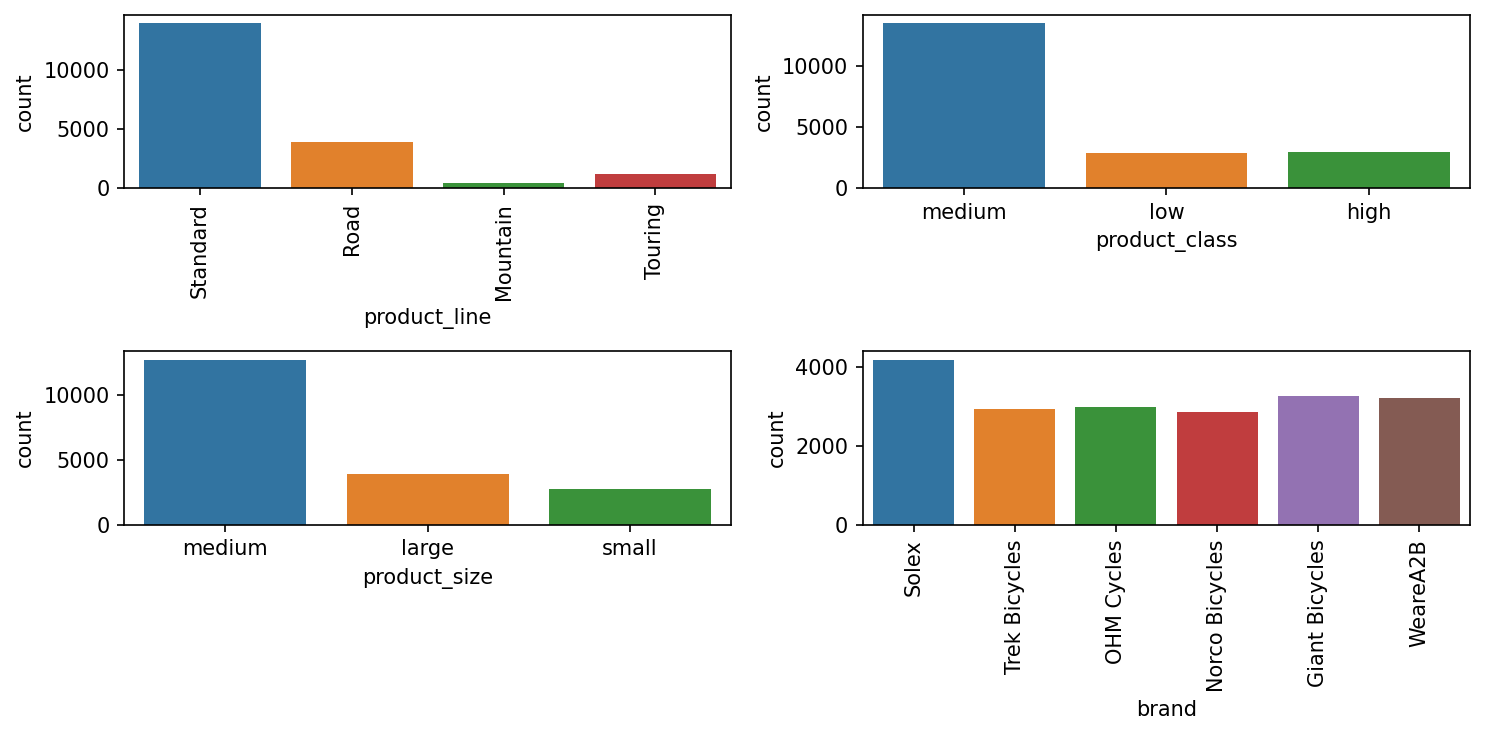

In [99]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=150, nrows=2, ncols=2)
tl, tr, dl, dr = ax[0, 0], ax[0, 1], ax[1, 0], ax[1, 1]

cp = sns.countplot(data=analyze_df, x='product_line', ax=tl)#, order=analyze_df['product_line'].unique())
cp = sns.countplot(data=analyze_df, x='product_class', ax=tr)#, order=analyze_df['product_class'].unique())
cp = sns.countplot(data=analyze_df, x='product_size', ax=dl)#, order=analyze_df['product_size'].unique())
cp = sns.countplot(data=analyze_df, x='brand', ax=dr)#, order=analyze_df['brand'].unique())



tl.set_xticklabels(labels=analyze_df['product_line'].unique(), rotation=90)
dr.set_xticklabels(labels=analyze_df['brand'].unique(), rotation=90)
fig.tight_layout()

#### PRICE TREND ALONG TIMELINE

In [105]:
monthly_price = analyze_df[['trans_month_num', 'list_price']].groupby(['trans_month_num']).mean().reset_index().rename(mapper={'list_price': 'average_price'}, axis=1)
monthly_price

,trans_month_num,average_price
0,1,1110.827010
1,2,1108.127308
2,3,1095.152876
3,4,1113.354063
4,5,1137.657246
5,6,1114.585638
6,7,1100.880462
7,8,1105.057269
8,9,1111.437726
9,10,1107.804442


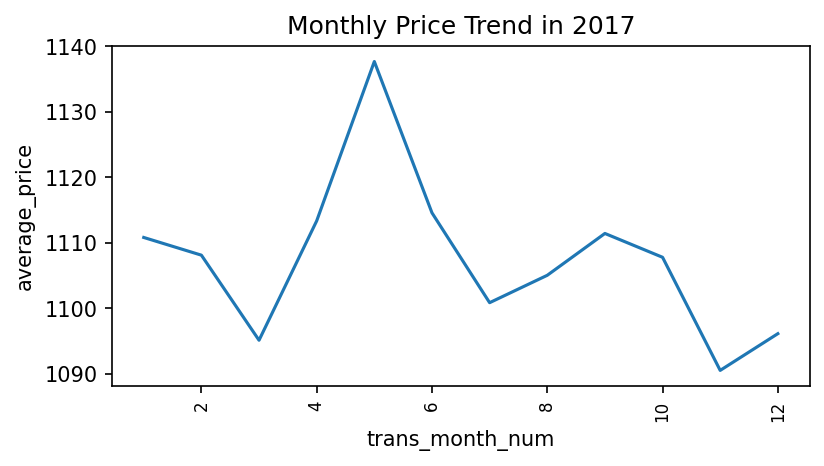

In [106]:
plt.figure(figsize=(6, 3), dpi=150)
sns.lineplot(data=monthly_price, x='trans_month_num', y='average_price')
plt.xticks(size=8, rotation=90)
plt.title('Monthly Price Trend in 2017');

#### Monthly sales volume

In [239]:
monthly_sales = pd.DataFrame(analyze_df[['trans_month_num']].value_counts(), index=analyze_df[['trans_month_num']].value_counts().index)
monthly_sales.columns = monthly_sales.columns.astype(np.str_).str.replace('0', 'sold_units')
monthly_sales

,sold_units
trans_month_num,
10,1720
8,1699
7,1665
5,1634
1,1632
11,1617
4,1607
3,1596
12,1594


In [255]:
# print([n for a in monthly_sales.index for n in a])

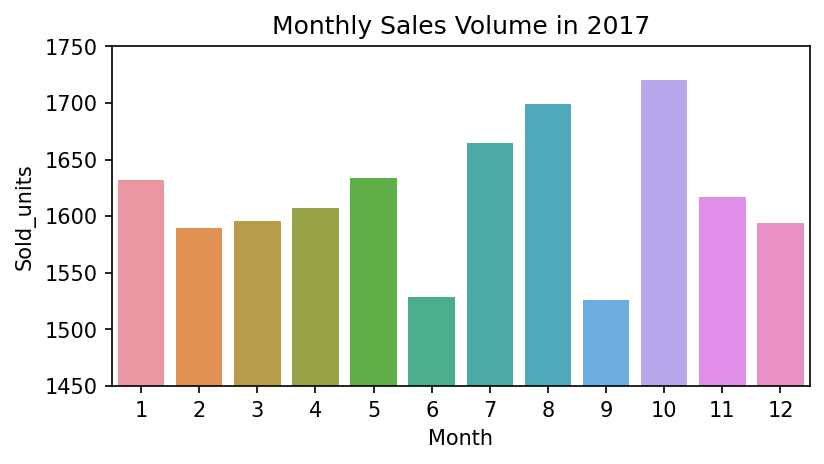

In [258]:
plt.figure(figsize=(6, 3), dpi=150)
sns.barplot(x=[n for a in monthly_sales.index for n in a], y=monthly_sales['sold_units'])
plt.ylabel("Sold_units"), plt.xlabel('Month')
plt.ylim(bottom=1450, top=1750)
plt.title('Monthly Sales Volume in 2017');

10    1720
8     1699
7     1665
5     1634
1     1632
11    1617
4     1607
3     1596
12    1594
2     1590
6     1529
9     1526
Name: trans_month_num, dtype: int64


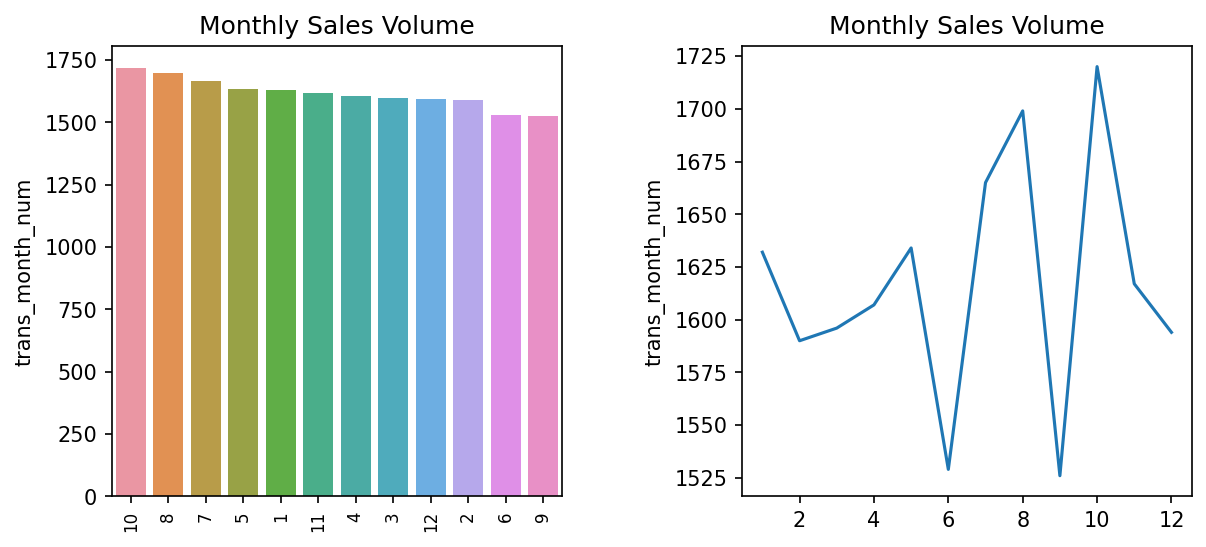

In [269]:
result = analyze_df['trans_month_num'].value_counts()
print(result)

fig = plt.figure(figsize=(6, 3), dpi=150)
l, r = fig.add_axes([0, 0, .5, 1]), fig.add_axes([.7, 0, .5, 1])

sns.barplot(x=result.index, y=result, order=result.index, ax=l)
sns.lineplot(x=result.index, y=result, ax=r)

l.set_xticklabels(labels=result.index, size=8, rotation=90)
l.set_title('Monthly Sales Volume'), r.set_title('Monthly Sales Volume');

#### Monthly cost, revenue and profit

In [123]:
monthly_cost = analyze_df[['trans_month_num', 'standard_cost']].groupby(by=['trans_month_num']).sum()
monthly_cost

,standard_cost
trans_month_num,
1,903173.67
2,900901.82
3,889324.88
4,902539.56
5,960490.64
6,861024.55
7,914666.76
8,929194.49
9,851023.09


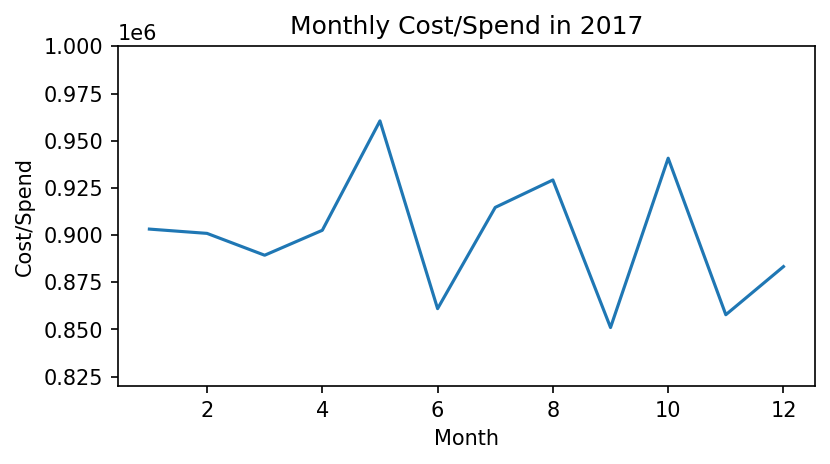

In [144]:
plt.figure(figsize=(6, 3), dpi=150)
sns.lineplot(x=monthly_cost.index, y=monthly_cost['standard_cost'])
plt.ylabel("Cost/Spend"), plt.xlabel('Month')
plt.ylim(bottom=8.2e5, top=10e5)  # ie, 820,000 to 1,000,000
plt.title('Monthly Cost/Spend in 2017');

In [181]:
monthly_revenue = analyze_df[['trans_month_num', 'list_price']].groupby(by=['trans_month_num']).sum()
monthly_revenue.sort_values(by='list_price', ascending=False).head()

,list_price
trans_month_num,
10,1905423.64
8,1877492.30
5,1858931.94
7,1832965.97
1,1812869.68


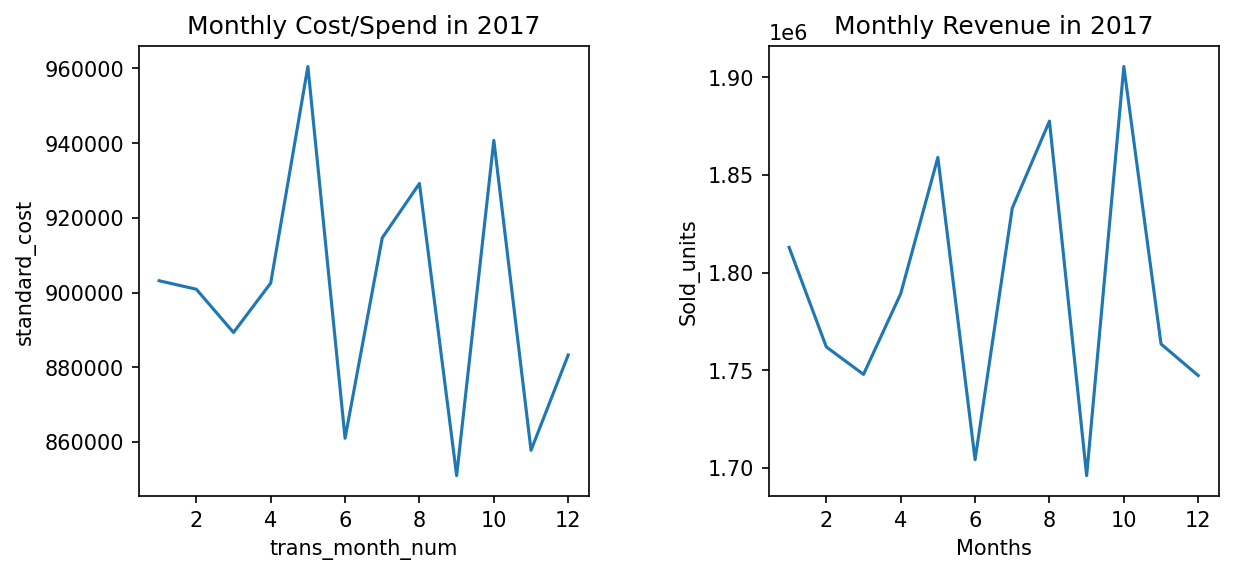

In [160]:
fig = plt.figure(figsize=(6, 3), dpi=150)
l, r  = fig.add_axes([0, 0, .5, 1]), fig.add_axes([.7, 0, .5, 1])
sns.lineplot(x=monthly_cost.index, y=monthly_cost['standard_cost'], ax=l)
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue['list_price'], ax=r)
plt.ylabel("Sold_units"), plt.xlabel('Months')
# plt.ylim(bottom=1450, top=1750)
l.set_title('Monthly Cost/Spend in 2017'), r.set_title('Monthly Revenue in 2017');

#### Monthly sales profit

In [179]:
monthly_profit = analyze_df[['trans_month_num', 'trans_profit']].groupby(by=['trans_month_num']).sum()
monthly_profit.sort_values('trans_profit', ascending=False).head()

,trans_profit
trans_month_num,
10,964688.57
8,948297.81
7,918299.21
1,909696.01
11,905626.20


In [171]:
#Alternativel:
# monthly_revenue['list_price'] - monthly_cost['standard_cost']

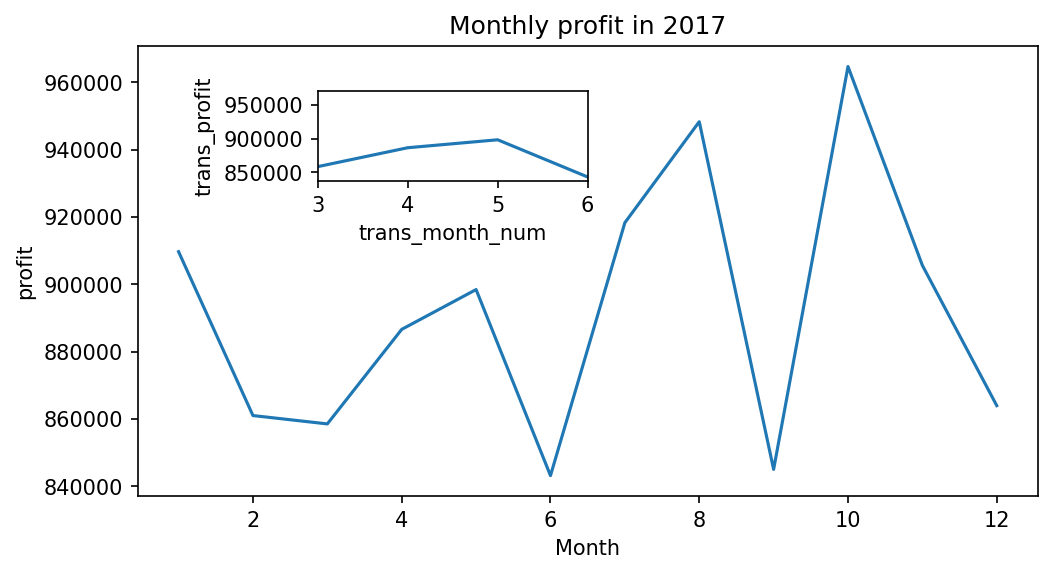

In [201]:
fig = plt.figure(figsize=(6, 3), dpi=150)
big, zoomed = fig.add_axes([0, 0, 1, 1]), fig.add_axes([.2, .7, .3, .2])

sns.lineplot(x=monthly_profit.index, y=monthly_profit['trans_profit'], ax=big)
sns.lineplot(x=monthly_profit.index, y=monthly_profit['trans_profit'], ax=zoomed)

zoomed.set_xlim(left=3, right=6)
big.set_ylabel("profit"), big.set_xlabel('Month')
big.set_title('Monthly profit in 2017');

#### Daily Revenue

In [272]:
result = kpmg_df[['trans_month_num', 'trans_day_num', 'list_price']].groupby(['trans_month_num', 'trans_day_num']).sum().rename(mapper={'list_price': 'revenue'}, axis=1)#.reset_index()
# result.xs(["May", 1])
result

revenue
trans_month_num trans_day_num          
1               1              57271.32
                2              57765.79
                3              59072.63
                4              63257.18
                5              72333.32
...                                 ...
12              26             56262.98
                27             53454.09
                28             66032.71
                29             53931.25
                30             50759.48

[364 rows x 1 columns]

#### Monthly revenue calculated from daily revenue
Using a multi-level indexer with the groupby parameter <b>'level'</b>

In [273]:
result.groupby(level='trans_month_num').sum().sort_values('revenue', ascending=False).head()

,revenue
trans_month_num,
10,1905423.64
8,1877492.30
5,1858931.94
7,1832965.97
1,1812869.68


In [275]:
analyze_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender', 'address',
       'postcode', 'state', 'DOB', 'job_title', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'property_valuation',
       'past_3_years_bike_related_purchases', 'product_id', 'transaction_date',
       'online_order', 'brand', 'product_line', 'product_class',
       'product_size', 'product_first_sold_date', 'trans_week_day',
       'trans_day_num', 'trans_month_num', 'trans_month', 'trans_year',
       'standard_cost', 'list_price', 'trans_profit'],
      dtype='object')

#### Sales volume per week day

In [276]:
result = analyze_df['trans_week_day'].value_counts().sort_values()
result.name = 'sales_vol_per_weekday'
result

Thursday     2717
Friday       2720
Tuesday      2764
Saturday     2775
Monday       2788
Sunday       2812
Wednesday    2833
Name: sales_vol_per_weekday, dtype: int64

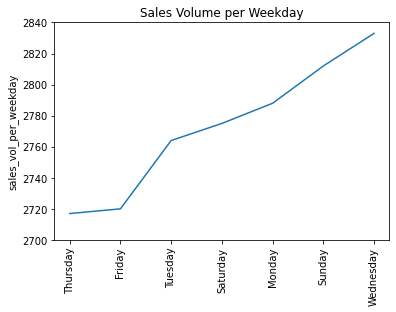

In [278]:
sns.lineplot(x=result.index, y=result)

plt.xticks(rotation=90), plt.ylim(bottom=2700, top=2840)

plt.title('Sales Volume per Weekday')
plt.show()

#### Profit per week day

In [280]:
result = analyze_df[['trans_week_day', 'trans_profit']].groupby('trans_week_day').sum().rename(mapper={'trans_profit': 'profit_per_weekday'}, 
                                                                                        axis=1).sort_values('profit_per_weekday')
result

,profit_per_weekday
trans_week_day,
Monday,1499106.68
Friday,1504791.79
Tuesday,1505978.93
Sunday,1511875.29
Thursday,1519585.28
Saturday,1563768.77
Wednesday,1598296.92


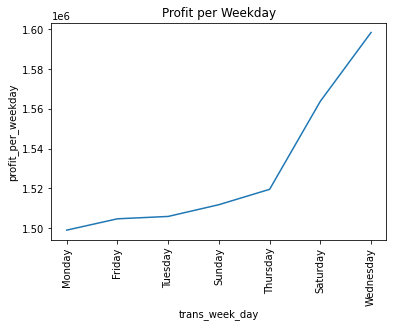

In [283]:
sns.lineplot(x=result.index, y=result['profit_per_weekday'])
plt.title('Profit per Weekday'), plt.xticks(rotation=90)
plt.show()

<b>NOTE: <br></b>
    The best day for <b>sales</b> was <b>Wednesday</b><br>
    The most-profitable day was <b>Wednesday</b><br>
    The worst day for <b>sales</b> was <b>Thursday</b><br>
    And the least-profitable day was <b>Monday</b>

In [284]:
analyze_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender', 'address',
       'postcode', 'state', 'DOB', 'job_title', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'property_valuation',
       'past_3_years_bike_related_purchases', 'product_id', 'transaction_date',
       'online_order', 'brand', 'product_line', 'product_class',
       'product_size', 'product_first_sold_date', 'trans_week_day',
       'trans_day_num', 'trans_month_num', 'trans_month', 'trans_year',
       'standard_cost', 'list_price', 'trans_profit'],
      dtype='object')

#### Profit made from each product_line

In [285]:
result = analyze_df[['product_line', 'trans_profit']].groupby(['product_line']).sum().sort_values('trans_profit').rename(mapper={'trans_profit': 'total_profit'},
                                                                                                            axis=1)
result

,total_profit
product_line,
Mountain,39825.99
Touring,1317869.29
Road,1372163.86
Standard,7973544.52


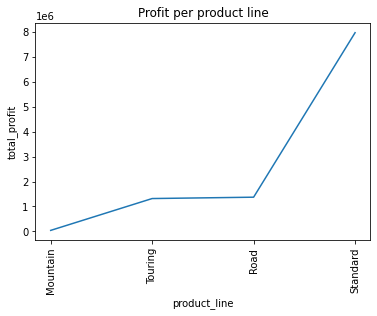

In [286]:
sns.lineplot(x=result.index, y=result['total_profit'])
plt.xticks(rotation=90)
plt.title('Profit per product line');

#### Sales per product_line

In [287]:
result = analyze_df['product_line'].value_counts().sort_values()
result.name = 'sales_vol_per_productline'
result

Mountain      413
Touring      1206
Road         3887
Standard    13903
Name: sales_vol_per_productline, dtype: int64

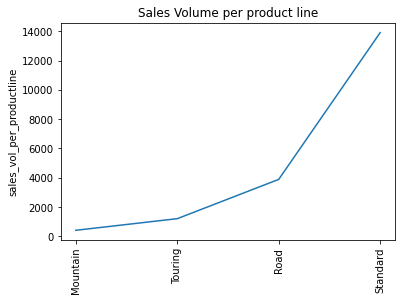

In [288]:
sns.lineplot(x=result.index, y=result)
plt.xticks(rotation=90)
plt.title('Sales Volume per product line');

<b>NOTE:<br></b>
    The <b>best-selling</b> product_line is also <b>most-profitable: Standard<br></b>
    And the <b>worst-selling</b> product_line is also the <b>least_profitable: Mountain</b>

In [289]:
analyze_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender', 'address',
       'postcode', 'state', 'DOB', 'job_title', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'property_valuation',
       'past_3_years_bike_related_purchases', 'product_id', 'transaction_date',
       'online_order', 'brand', 'product_line', 'product_class',
       'product_size', 'product_first_sold_date', 'trans_week_day',
       'trans_day_num', 'trans_month_num', 'trans_month', 'trans_year',
       'standard_cost', 'list_price', 'trans_profit'],
      dtype='object')

#### SAVE JUPYTER NOTEBOOK TO SYSTEM

In [ ]:
pth = 'C:\\Users\\welcome'
sf = mf.file_search(pth, 'KPMG', 'ipynb')
sf.keys()

In [ ]:
stop here

In [291]:
import shutil

In [292]:
# joblib.os.listdir("W:\\Analyst & Business Skillset\\Data analysis\\Datasets\\KPMG Raw Datasets")
dest = "W:\\Analyst & Business Skillset\\Data analysis\\Datasets\\KPMG Raw Datasets\\"
shutil.copy(sf['KPMG-visualization-analysis.ipynb'], dest)

KeyError: 'KPMG-visualization-analysis.ipynb'

## --- THE END ---